### COMBINING & MERGING OF DATASETS

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(10,6))
from pandas import Series, DataFrame
import pandas as pd

%matplotlib inline

In [6]:
df1 = pd.DataFrame({
    'data1': range(7),
    'key': list('bbacaab')
})
df2 = pd.DataFrame({
    'data2': range(20,23),
    'key': list('abd')
})

In [7]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [8]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [9]:
df1.merge(df2)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [12]:
df2_wdups = pd.DataFrame({
    'data2': range(20,24),
    'key': list('abda')
})

In [13]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [14]:
df1.merge(df2_wdups)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


In [15]:
# Llamamos "lkey" o "rkey" por "left" y "right" por convención
df3 = pd.DataFrame({
    'data1': range(7),
    'lkey': list('bbacaab')
})
df4 = pd.DataFrame({
    'data2': range(3),
    'rkey': list('abd')
})


In [16]:
df3.merge(df4,
          left_on = 'lkey',
          right_on = 'rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [18]:
#Operación conmutativa

df4.merge(df3,
          left_on = 'rkey',
          right_on = 'lkey')

,data2,rkey,data1,lkey
0,0,a,2,a
1,0,a,4,a
2,0,a,5,a
3,1,b,0,b
4,1,b,1,b
5,1,b,6,b


In [19]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [20]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [21]:
df1.merge(df2, how='outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


In [22]:
#Es interesante ver que los datos los han cambiado a "float", probablemente debido a la existencia de NaN

In [23]:
df2_wdups

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


In [24]:
df1.merge(df2_wdups,how = 'outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,2.0,a,23.0
5,4.0,a,20.0
6,4.0,a,23.0
7,5.0,a,20.0
8,5.0,a,23.0
9,3.0,c,NaN


In [25]:
df1.merge(df2,how = 'left')

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


In [26]:
df1['X'] = 42
df1

,data1,key,X
0,0,b,42
1,1,b,42
2,2,a,42
3,3,c,42
4,4,a,42
5,5,a,42
6,6,b,42


In [27]:
df2['X'] = 42
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


In [28]:
df1.merge(df2,on='key')

,data1,key,X_x,data2,X_y
0,0,b,42,21,42
1,1,b,42,21,42
2,6,b,42,21,42
3,2,a,42,20,42
4,4,a,42,20,42
5,5,a,42,20,42


In [30]:
df1.merge(df2,on='key',suffixes=['_left','_right'])

,data1,key,X_left,data2,X_right
0,0,b,42,21,42
1,1,b,42,21,42
2,6,b,42,21,42
3,2,a,42,20,42
4,4,a,42,20,42
5,5,a,42,20,42


In [36]:
df5 = pd.DataFrame({'g':range(4),
                    'h':range(8,12)
                    },
                   index = list('abcd'))



In [37]:
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [38]:
df1

,data1,key,X
0,0,b,42
1,1,b,42
2,2,a,42
3,3,c,42
4,4,a,42
5,5,a,42
6,6,b,42


In [39]:
df1.merge(df5, left_on='key', right_index=True)

,data1,key,X,g,h
0,0,b,42,1,9
1,1,b,42,1,9
6,6,b,42,1,9
2,2,a,42,0,8
4,4,a,42,0,8
5,5,a,42,0,8
3,3,c,42,2,10


In [40]:
df1

,data1,key,X
0,0,b,42
1,1,b,42
2,2,a,42
3,3,c,42
4,4,a,42
5,5,a,42
6,6,b,42


In [41]:
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [42]:
pd.concat([df1,df5])

,data1,key,X,g,h
0,0.0,b,42.0,NaN,NaN
1,1.0,b,42.0,NaN,NaN
2,2.0,a,42.0,NaN,NaN
3,3.0,c,42.0,NaN,NaN
4,4.0,a,42.0,NaN,NaN
5,5.0,a,42.0,NaN,NaN
6,6.0,b,42.0,NaN,NaN
a,NaN,NaN,NaN,0.0,8.0
b,NaN,NaN,NaN,1.0,9.0
c,NaN,NaN,NaN,2.0,10.0


In [43]:
a1 = np.arange(0,24).reshape(4,6)
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [44]:
a2 = np.arange(25,37).reshape(4,3)
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

In [45]:
a3 = np.concatenate([a1,a2],axis=1)
a3

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

In [46]:
#Ahora vamos a ver series

In [49]:
s1 = pd.Series(range(4),index=list('abdc'))
s2 = pd.Series(range(10,13),index=list('lmn'))
s3 = pd.Series(range(40,43),index=list('xyz'))
print(f'{s1},{s2},{s3}')

a    0
b    1
d    2
c    3
dtype: int64,l    10
m    11
n    12
dtype: int64,x    40
y    41
z    42
dtype: int64


In [52]:
result = pd.concat([s1,s2,s3],axis=1)
result

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
d,2.0,NaN,NaN
c,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [53]:
#www.transtast.bts.gov

In [54]:
drive_loc = '/content/gdrive'
files_loc = os.path.join(drive_loc,'MyDrive','pdsfiles')

from google.colab import drive
drive.mount(drive_loc)

Mounted at /content/gdrive


In [55]:
!wget https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip -P {files_loc}

--2021-01-08 17:15:54--  https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip
Resolving transtats.bts.gov (transtats.bts.gov)... 204.68.194.70
Connecting to transtats.bts.gov (transtats.bts.gov)|204.68.194.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30370031 (29M) [application/x-zip-compressed]
Saving to: ‘/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip’

On_Time_Reporting_C 100%[===================>]  28.96M   675KB/s    in 44s     

2021-01-08 17:16:38 (682 KB/s) - ‘/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip’ saved [30370031/30370031]



In [56]:
!wget https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip -P {files_loc}

--2021-01-08 17:16:52--  https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip
Resolving transtats.bts.gov (transtats.bts.gov)... 204.68.194.70
Connecting to transtats.bts.gov (transtats.bts.gov)|204.68.194.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12878743 (12M) [application/x-zip-compressed]
Saving to: ‘/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip’

On_Time_Reporting_C 100%[===================>]  12.28M  1013KB/s    in 13s     

2021-01-08 17:17:07 (941 KB/s) - ‘/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip’ saved [12878743/12878743]



In [57]:
!cd {files_loc}; unzip -q *_3.zip; unzip -q *_4.zip

replace readme.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [59]:
!ls {files_loc}

 207831-0-accidentes-trafico.xls
 csv_output.xls
 df2.pkl
 drug200.csv
 example.db
 example.db_2
 excel_output.xls
 gender_submission.csv
 iris_data.txt
 nba.csv
'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv'
 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip
'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_4.csv'
 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip
 out.csv_2
 PruebasNorm_datos1.csv
 readme.html
 s3.pkl
 T100_AIRLINES.csv
 T100I_SEGMENT_ALL_CARRIER.csv
 test.csv
 train.csv
 uk_data.csv


In [60]:
readme_loc = os.path.join(files_loc, 'readme.html')

In [61]:
!head {readme_loc}

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


In [62]:
from IPython.display import display, HTML
display (HTML(filename = readme_loc))

In [64]:
march_file = !cd {files_loc}; ls {files_loc}/*_3.zip
march_file

['/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip']

In [65]:
zip_file = march_file[0]

In [66]:
import zipfile
zip_file_handle = zipfile.ZipFile(zip_file)

In [68]:
type(zip_file_handle)

zipfile.ZipFile

In [69]:
zip_file_handle.namelist()

['On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv',
 'readme.html']

In [70]:
csv, readme = zip_file_handle.namelist()

In [73]:
csv_file = zip_file_handle.open(csv)

In [74]:
df = pd.read_csv(csv_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
#Ojo, que hay que cerrar los archivos, porque los hemos abierto al descomprimirlos.
#No confundir con "read", que no necesita cerrar
csv_file.close()

In [76]:
zip_file_handle.close()

In [77]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Ahora hacemos lo mismo para el mes de abril

In [79]:
april_file = !cd {files_loc}; ls {files_loc}/*_4.zip
april_file

['/content/gdrive/MyDrive/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip']

In [80]:
zip_file_2 = april_file[0]

In [81]:
zip_file_handle_2 = zipfile.ZipFile(zip_file_2)

In [82]:
csv_2, readme_2 = zip_file_handle_2.namelist()


In [83]:
csv_2_file = zip_file_handle_2.open(csv_2)


In [85]:
df2 = pd.read_csv(csv_2_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
csv_2_file.close()
zip_file_handle_2.close()

In [88]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,2,4,4,6,2020-04-04,G4,20368,G4,NaN,252,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,14082,1408202,34082,PGD,"Punta Gorda, FL",FL,12,Florida,33,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,4,10,5,2020-04-10,G4,20368,G4,NaN,331,14314,1431402,34314,PVU,"Provo, UT",UT,49,Utah,87,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1124,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,4,13,1,2020-04-13,G4,20368,G4,NaN,851,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,14112,1411206,33195,PIE,"St. Petersburg, FL",FL,12,Florida,33,2052,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,4,12,7,2020-04-12,G4,20368,G4,NaN,216,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14905,1490505,34905,SMX,"Santa Maria, CA",CA,6,California,91,1600,NaN,NaN,NaN,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,4,16,4,2020-04-16,G4,20368,G4,NaN,65,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48,Texas,74,1513,NaN,NaN,NaN,NaN,NaN,1500-1559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_tot = pd.concat([df,df2])

In [90]:
df_tot.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#FUNCIÓN PARA HACER MÁS ELEGANTEMENTE EL CARGADO DE DATOS EN LOS DFs

def get_df_from_zip(zip_filepath):
 zip_file_handle = zipfile.ZipFile(zip_filepath)
 csv_filename, _ = zip_file_handle.namelist()
 csv_file = zip_file_handle.open(csv_filename)
 csv_df = pd.read_csv(csv_file)
 csv_file.close()
 zip_file_handle.close()
 return csv_df

april_file = !cd {files_loc}; ls {files_loc}/*_4.zip
df_otp = pd.concat([get_df_from_zip(march_file[0]),get_df_from_zip(april_file[0])])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [92]:
df_otp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
pd.options.display.max_columns = None

In [94]:
df_otp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [95]:
df_otp.shape

(961611, 110)

In [96]:
print(df_otp.size)

105777210


In [97]:
df_tot.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Unnamed: 109        float64
Length: 110, dtype: object

In [98]:
df6 = pd.DataFrame({
    'key1': ['one'] * 3 + ['two'] * 4,
    'key2': [1,1,2,3,3,4,4]
})
df6

,key1,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [100]:
df6.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [102]:
df6.drop_duplicates()

,key1,key2
0,one,1
2,one,2
3,two,3
5,two,4


In [103]:
df6.drop_duplicates(keep='last',subset='key1')

,key1,key2
2,one,2
6,two,4


###CONSIDEREMOS AHORA ENCONTRAR EL NÚMERO DE AEROPUERTOS Y EL NÚMERO DE RUTAS (COMO COMBINACIÓN DE DESTINO Y ORIGEN)

In [105]:
df_otp['OriginAirportID'].value_counts().shape

(353,)

In [107]:
df_otp[['OriginAirportID','DestAirportID']].value_counts().shape

(5844,)

In [108]:
#Otra manera de hacerlo
df_otp.drop_duplicates(subset='OriginAirportID').count()['OriginAirportID']

353

DISCRETIZATION AND BINNING

In [109]:
!wget http://bit.ly/ks-pds-csv8 -P {files_loc}

--2021-01-08 18:45:33--  http://bit.ly/ks-pds-csv8
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=view&id=1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx [following]
--2021-01-08 18:45:33--  https://drive.google.com/uc?export=view&id=1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx
Resolving drive.google.com (drive.google.com)... 172.217.3.14, 2607:f8b0:4026:800::200e
Connecting to drive.google.com (drive.google.com)|172.217.3.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dlhiplkofonibvj2qsgqs4i7830hgb1t/1610131500000/09168289428562857012/*/1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx?e=view [following]
--2021-01-08 18:45:34--  https://doc-0c-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg

In [110]:
orig_filepath = os.path.join(files_loc,'ks-pds-csv8')
sales_dat_filename = 'sales_data_csv'
sales_data_filepath = os.path.join(files_loc, sales_dat_filename)


In [111]:
!mv {orig_filepath} {sales_data_filepath}

In [112]:
raw_df = pd.read_csv(sales_data_filepath)

In [113]:
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [115]:
raw_df.tail()

,account number,name,sku,quantity,unit price,ext price,date
1502,424914,White-Trantow,B1-69924,37,42.77,1582.49,2018-11-27 14:29:02
1503,424914,White-Trantow,S1-47412,16,65.58,1049.28,2018-12-19 15:15:41
1504,424914,White-Trantow,B1-86481,75,28.89,2166.75,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,1915.00,2018-12-22 03:31:36
1506,424914,White-Trantow,S2-83881,100,88.19,8819.00,2018-12-16 00:46:26


In [114]:
raw_df.shape

(1507, 7)

In [117]:
raw_df.describe()

,account number,quantity,unit price,ext price
count,1507.000000,1507.000000,1507.000000,1507.000000
mean,486155.565362,24.439283,54.919827,1349.851194
std,222189.242438,14.811189,25.891960,1110.820807
min,141962.000000,-1.000000,10.030000,-97.160000
25%,257198.000000,12.000000,32.375000,472.295000
50%,424914.000000,25.000000,55.140000,1049.280000
75%,714466.000000,37.000000,77.060000,2050.290000
max,786968.000000,100.000000,99.850000,8819.000000


In [124]:
df = raw_df.groupby(['account number','name'])['ext price'].sum().reset_index()
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


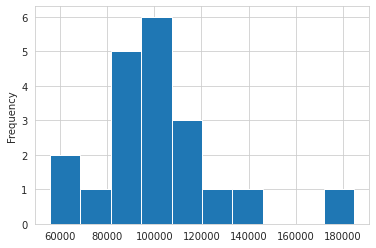

In [125]:
import seaborn as sns
sns.set_style('whitegrid')
df['ext price'].plot(kind = 'hist')

In [126]:
df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

In [127]:
#"qcut" asigna intervalos a cada registro
pd.qcut(df['ext price'],q = 4)

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] <
                                    (100271.535, 110132.552] < (110132.552, 184793.7]]

In [128]:
pd.qcut(df['ext price'],q = 4).dtypes

CategoricalDtype(categories=[(55733.049000000006, 89137.708], (89137.708, 100271.535], (100271.535, 110132.552], (110132.552, 184793.7]],
              ordered=True)

In [129]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q = 4)

In [130]:
df['quantile_ex_2'] = pd.qcut(df['ext price'], q = 10,precision=0)

In [131]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [132]:
df['quantile_ex_1'].value_counts()

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [133]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

In [134]:
bin_labels_5 = ['Bronze','Silver','Gold','Platinim','Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = bin_labels_5)

In [135]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [136]:
result, bin_edges = pd.qcut(df['ext price'], 
                            q = [0, 0.2, 0.4, 0.6, 0.8, 1], 
                            labels = bin_labels_5,
                            retbins = True)

In [139]:
type(bin_edges)

numpy.ndarray

In [140]:
type(bin_labels_5)

list

In [137]:
result_table = pd.DataFrame(zip(bin_edges,bin_labels_5),
                            columns=['Threshold','Tier'])

In [138]:
result_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinim
4,112290.054,Diamond


In [141]:
df = df.drop(columns=['quantile_ex_1','quantile_ex_2','quantile_ex_3'])

In [142]:
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


In [143]:
pd.cut(df['ext price'],bins=4)

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55603.989, 87998.212] < (87998.212, 120263.375] <
                                    (120263.375, 152528.538] < (152528.538, 184793.7]]

In [144]:
pd.cut(df['ext price'],bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

### STRING MANIPULATION

In [146]:
string = 'This is some sentence'
string.split()

['This', 'is', 'some', 'sentence']

In [148]:
animals = 'rhino giraffe molerat elephant cheetah mosquito whale'.split()

In [149]:
animals

['rhino', 'giraffe', 'molerat', 'elephant', 'cheetah', 'mosquito', 'whale']

In [152]:
df1['animals'] = animals

In [154]:
df1.drop(columns = ['rhino', 'giraffe', 'molerat', 'elephant', 'cheetah', 'mosquito', 'whale'],inplace=True)

In [155]:
df1

,data1,key,X,animals
0,0,b,42,rhino
1,1,b,42,giraffe
2,2,a,42,molerat
3,3,c,42,elephant
4,4,a,42,cheetah
5,5,a,42,mosquito
6,6,b,42,whale


In [156]:
animals_series = df1['animals']

In [157]:
animals_series.str

In [158]:
animals_series.str.len()

0    5
1    7
2    7
3    8
4    7
5    8
6    5
Name: animals, dtype: int64

In [159]:
animals_series.str.count('o')

0    1
1    0
2    1
3    0
4    0
5    2
6    0
Name: animals, dtype: int64

In [160]:
animals_series.str.contains('m')

0    False
1    False
2     True
3    False
4    False
5     True
6    False
Name: animals, dtype: bool

In [161]:
df1[animals_series.str.contains('m')]

,data1,key,X,animals
2,2,a,42,molerat
5,5,a,42,mosquito


In [163]:
series_with_blanks = pd.Series(['   SDF   ', 'DFFF     ','BL    '])
series_with_blanks

0       SDF   
1    DFFF     
2       BL    
dtype: object

In [164]:
series_with_blanks.str.rstrip()

0       SDF
1      DFFF
2        BL
dtype: object

In [165]:
df_otp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [170]:
df_otp.columns[df_otp.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [172]:
df_otp[df_otp.columns[df_otp.columns.str.contains('Origin')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
646064,14843,1484306,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3
619124,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13
530170,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23
411286,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
307121,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33


## DATA AGGREGATION

In [173]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
               'key2' : ['one', 'two', 'one', 'two', 'one'],
               'data1' : np.random.randn(5),
               'data2' : np.random.randn(5)})
df



,key1,key2,data1,data2
0,a,one,0.182099,1.667408
1,a,two,-0.476777,0.859630
2,b,one,1.597163,0.767498
3,b,two,0.844209,-0.734863
4,a,one,0.368573,0.394198


In [175]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [176]:
df['data1']

0    0.182099
1   -0.476777
2    1.597163
3    0.844209
4    0.368573
Name: data1, dtype: float64

In [177]:
df['key1']

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [178]:
grouped.sum()

key1
a    0.073896
b    2.441372
Name: data1, dtype: float64

In [179]:
means = df.groupby(['key1','key2','data2']).mean()
means

data1
key1 key2 data2              
a    one   0.394198  0.368573
           1.667408  0.182099
     two   0.859630 -0.476777
b    one   0.767498  1.597163
     two  -0.734863  0.844209

In [180]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [184]:
df['data1'].groupby([states,years]).mean()

California  2005   -0.476777
            2006    1.597163
Ohio        2005    0.513154
            2006    0.368573
Name: data1, dtype: float64

In [185]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.024632,0.973745
b,1.220686,0.016317


In [186]:
df

,key1,key2,data1,data2
0,a,one,0.182099,1.667408
1,a,two,-0.476777,0.859630
2,b,one,1.597163,0.767498
3,b,two,0.844209,-0.734863
4,a,one,0.368573,0.394198


In [188]:
#Esto es te da la primera fila de cada grupo que está creando
df.groupby(['key1']).head(1)

,key1,key2,data1,data2
0,a,one,0.182099,1.667408
2,b,one,1.597163,0.767498


In [190]:
#Ojo, que cuando hay varios, lo ordena por el índice
df.groupby(['key1']).head(3)

,key1,key2,data1,data2
0,a,one,0.182099,1.667408
1,a,two,-0.476777,0.859630
2,b,one,1.597163,0.767498
3,b,two,0.844209,-0.734863
4,a,one,0.368573,0.394198


In [191]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [192]:
for name, group in df.groupby('key1'):
  print(name)
  print(group)

a
  key1 key2     data1     data2
0    a  one  0.182099  1.667408
1    a  two -0.476777  0.859630
4    a  one  0.368573  0.394198
b
  key1 key2     data1     data2
2    b  one  1.597163  0.767498
3    b  two  0.844209 -0.734863


In [194]:
for (k1, k2), group in df.groupby(['key1','key2']):
  print(k1,k2)
  print(group)

a one
  key1 key2     data1     data2
0    a  one  0.182099  1.667408
4    a  one  0.368573  0.394198
a two
  key1 key2     data1    data2
1    a  two -0.476777  0.85963
b one
  key1 key2     data1     data2
2    b  one  1.597163  0.767498
b two
  key1 key2     data1     data2
3    b  two  0.844209 -0.734863


In [196]:
df.groupby('key1')

In [197]:
list(df.groupby('key1'))

[('a',   key1 key2     data1     data2
  0    a  one  0.182099  1.667408
  1    a  two -0.476777  0.859630
  4    a  one  0.368573  0.394198), ('b',   key1 key2     data1     data2
  2    b  one  1.597163  0.767498
  3    b  two  0.844209 -0.734863)]

In [198]:
pieces = dict(list(df.groupby('key1')))

In [199]:
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.182099  1.667408
 1    a  two -0.476777  0.859630
 4    a  one  0.368573  0.394198, 'b':   key1 key2     data1     data2
 2    b  one  1.597163  0.767498
 3    b  two  0.844209 -0.734863}

In [200]:
type(pieces['b'])

pandas.core.frame.DataFrame

In [201]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [202]:
grouped = df.groupby(df.dtypes,axis=1)

In [203]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.182099  1.667408
 1 -0.476777  0.859630
 2  1.597163  0.767498
 3  0.844209 -0.734863
 4  0.368573  0.394198, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [204]:
df.groupby('key1')

In [205]:
df.groupby('key1')['data1']

In [206]:
df.groupby('key1')[['data2']]